<a href="https://colab.research.google.com/github/MJ-best/TimeSerise_StudyNote/blob/main/TimeSerise_StudyNote_%EB%94%B0%EB%A6%89%EC%9D%B4_2023_01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열데이터 공부노트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import datetime
from pytz import timezone

print("last update : ",datetime.datetime.now(timezone('Asia/Seoul')))

last update :  2023-01-02 19:07:21.669350+09:00


## [DACON] 2022 UOS 빅데이터 알고리즘 경진대회

[출처] https://dacon.io/competitions/official/236029/overview/description

[배경]전 세계의 많은 도시가 교통 정체와 대기 오염의 감축을 위해 공유 자전거 시스템을 도입하고 있으며,

국내의 경우에는 대표적으로 2015년부터 서울시에서 서비스 중인 '따릉이'라는 공유 자전거 시스템이 있습니다.

따릉이 이용객이 증가함에 따라 각 지역구에서 공유 자전거 수요는 증가하고 있지만, 한정된 예산하에서 수요를 관리하기 때문에 운영과 관리에 어려움이 존재합니다.

또한 최근에는 코로나로 인한 사회적 거리두기가 해제되면서 서울시의 따릉이 수요는 나날이 급증하고 있습니다.



따라서 다음 해의 서울시 지역구별 따릉이 수요를 정확히 예측할 수 있다면 대여소의 확장, 공유 자전거 신규 도입 등에 더 효율적으로 예산을 활용할 수 있을 것입니다.



이번 경진대회에서 따릉이의 효율적인 운영과 관리에 도움을 줄 수 있는 서울시 지역구별 따릉이 대여량 예측 AI 모델을 만들어 주세요.



[주제]
서울시 지역구별 따릉이 대여량 예측 모델 개발



[설명]
2022년의 서울시 지역구별 일별 따릉이 대여량 회귀 예측

In [2]:
import io
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
# 한글폰트 깨짐 현상 때문에 설정
plt.rc('font', family='NanumBarunGothic') 
# 그래프가 꽉차게 나오게 하려고 설정
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/[DACON]UOS따릉이시계열분석/data'
os.chdir(path)
df = pd.read_csv("train.csv", encoding='utf-8-sig', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


- 데이터프레임의 '일시' 열의 데이터는 int인데 이를 str으로 변환한다음에 datetime형으로 변환해준다.
- 이후 datetime을 인덱스로 설정해준다

In [5]:
df['일시'] = df['일시'].astype('str')

In [6]:
df['일시'] = pd.to_datetime(df['일시'])

In [7]:
df['일시']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1456   2021-12-27
1457   2021-12-28
1458   2021-12-29
1459   2021-12-30
1460   2021-12-31
Name: 일시, Length: 1461, dtype: datetime64[ns]

In [8]:
df.set_index('일시' , inplace = True)

In [9]:
df

,광진구,동대문구,성동구,중랑구
일시,,,,
2018-01-01,0.592,0.368,0.580,0.162
2018-01-02,0.840,0.614,1.034,0.260
2018-01-03,0.828,0.576,0.952,0.288
2018-01-04,0.792,0.542,0.914,0.292
2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350
2021-12-28,4.510,3.890,3.714,2.700
2021-12-29,4.490,3.524,3.660,2.524


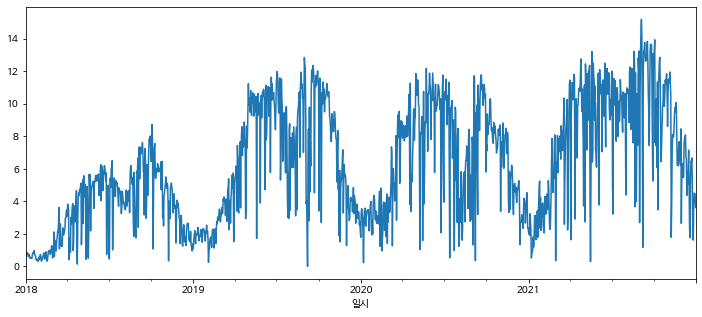

In [10]:
df['광진구'].plot()

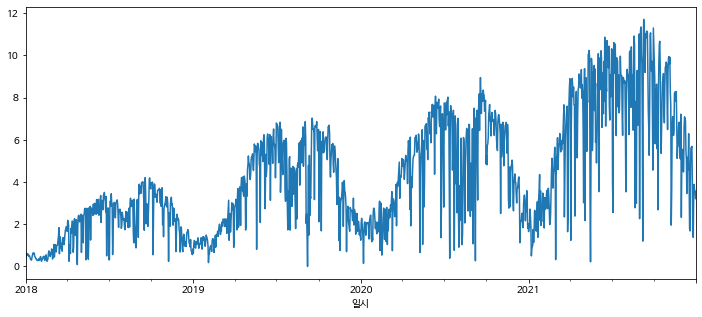

In [11]:
df['동대문구'].plot()

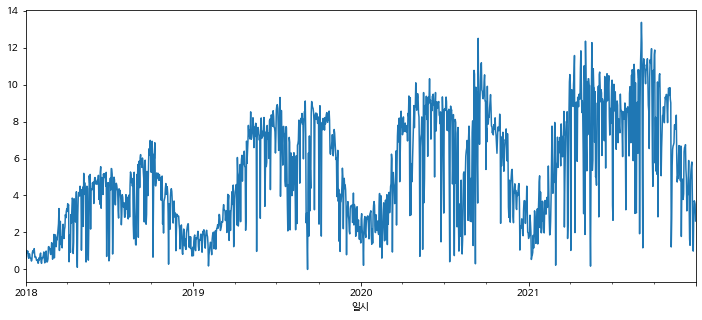

In [12]:
df['성동구'].plot()

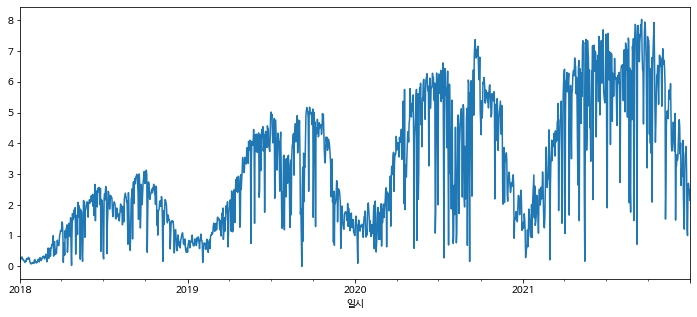

In [13]:
df['중랑구'].plot()

- state-model 중 호드릭-프레스콧 필터는  데이터 y를 추세(Trend)와 계절성(cycle)의 합으로 설명한다.

In [14]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle, trend = hpfilter(df['광진구'], lamb=1600)

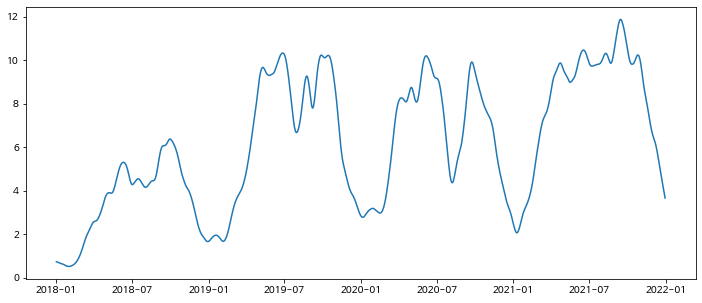

In [15]:
plt.plot(trend)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


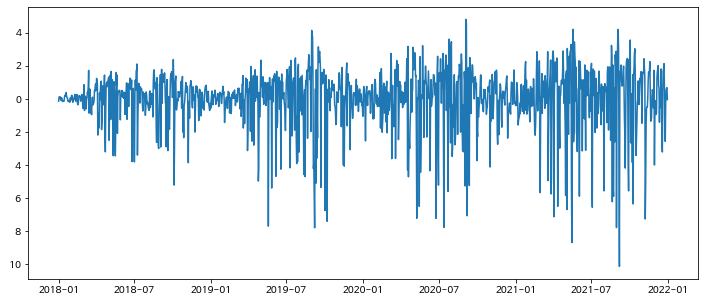

In [16]:
plt.plot(cycle)

In [17]:
df['추세'] = trend

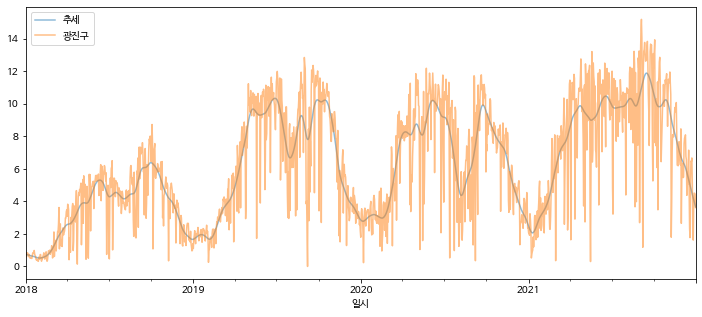

In [18]:
df[['추세','광진구']].plot(alpha = 0.5).autoscale(axis='x',tight=True);

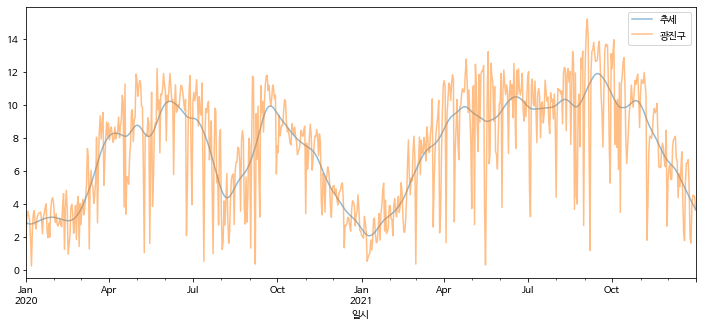

In [19]:
# 코로나 이후 추세확인
df[['추세','광진구']]['2020-01':].plot(alpha = 0.5).autoscale(axis='x',tight=True);

## Error/Trend/Seasonality Models 
- ETS모델이라고 불리는 이 기법은 데이터를 에러, 추세, 계절성으로 분해해서 분석한다.
- 특히 이 모델은 smoothing을 줘서 데이터를 좀더 일반화하는데에 초점이 맞춰져 있다
- 곱셈모델과 더하기 모델이 있는데 추세에 상관없이 계절성이 오르락 내리락한다면 더하기 모델
- 추세에 따라 두배씩 오른다거나 내린다거나 하면 곱하기 모델을 사용한다
- 마지막 잔차항은 추세나 계절성으로는 설명되지 않는 잡음을 의미한다 (이 잡음이 어떤 이벤트를 의미할 수도 있다)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


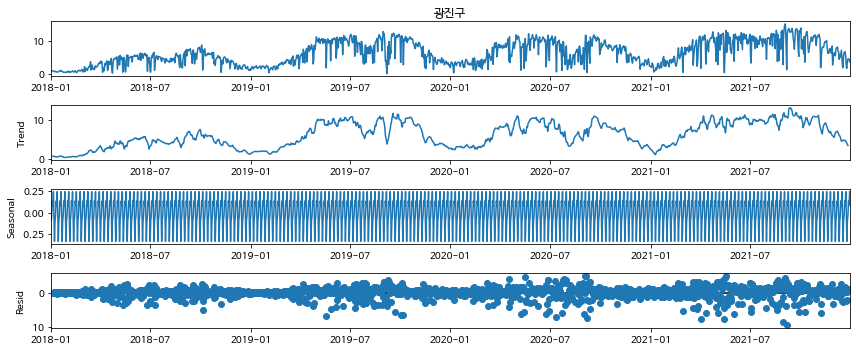

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['광진구'], model='add')

result.plot();

## EWMA 모델
- 단순이동모델(SMA)는 데이터 위도를 넓게 잡는다면 잘 예측하지만 윈도우가 작아질 수록 일반화 시키지 못하게 된다.
- SMA는 평균을 취하기때문에 피크를 찾아내지 못하게 된다.
- 극단적으로 크거나 작은 윈도우는 모델을 왜곡시킨다

- 최근의 데이터일수록 미래의 정보를 더 많이 가지고 있을 수 있다. 따라서 최신의 데이터에 조금더 비중을 둔 모델인 EWMA모델도 있다


### SMA모델
- plot된 데이터를 보면 SMA는 추세보다 뒤쳐지는 듯한 느낌을 받는다.
- window사이즈에 상관없이 피크값은 예측하지 못하는 것을 볼 수 있다.

In [21]:
df['1개월치-SMA'] = df['광진구'].rolling(window=30).mean()

In [22]:
df['6개월치-SMA'] = df['광진구'].rolling(window=183).mean()

In [23]:
df['12개월치-SMA'] = df['광진구'].rolling(window=365).mean()

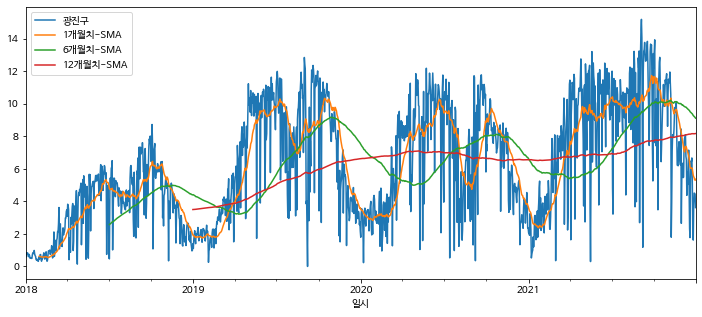

In [24]:
df[['광진구', '1개월치-SMA','6개월치-SMA', '12개월치-SMA']].plot()

In [25]:
# EWMA모델을 통해 최신의 데이터에 좀더 가중치를 준다
df['EWMA-12'] = df['광진구'].ewm(span=365).mean()

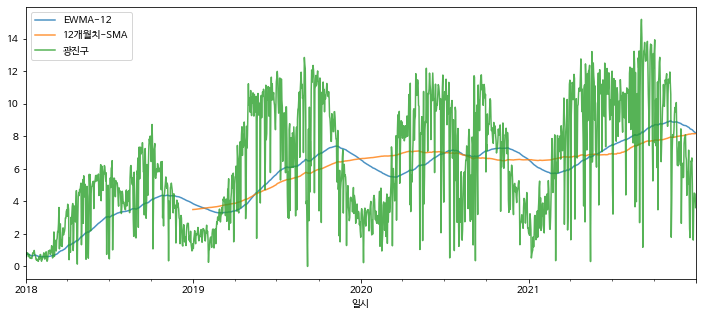

In [26]:
df[['EWMA-12','12개월치-SMA', '광진구']].plot(alpha=0.8)

## 홀트 윈터스 계절성 기법
- 이중 삼중으로 더하거나 곱해서 smooth를 주는 방법
- 홀트방법 : 스무딩 펙터 베타를 도입하여 추세를 얻어낸다
- 홀트방법만으로는 전반적인 수준과 추세를 예측할 수 있으나 시계열의 flucutate를 반영하지 못한다는 한계가 있음
- 윈터스 방법에선 스무딩 펙터 감마를 도입하여 계절성을 얻어낸다
- 레벨을 도입하는데 이는 잘 모르겠다


In [30]:
df

,광진구,동대문구,성동구,중랑구,추세,1개월치-SMA,6개월치-SMA,12개월치-SMA,EWMA-12
일시,,,,,,,,,
2018-01-01,0.592,0.368,0.580,0.162,0.738881,NaN,NaN,NaN,0.592000
2018-01-02,0.840,0.614,1.034,0.260,0.730561,NaN,NaN,NaN,0.716340
2018-01-03,0.828,0.576,0.952,0.288,0.722149,NaN,NaN,NaN,0.753764
2018-01-04,0.792,0.542,0.914,0.292,0.713622,NaN,NaN,NaN,0.763402
2018-01-05,0.818,0.602,0.994,0.308,0.705023,NaN,NaN,NaN,0.774441
...,...,...,...,...,...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350,4.087121,5.508267,9.246361,8.154493,8.298542
2021-12-28,4.510,3.890,3.714,2.700,3.980145,5.450333,9.215093,8.154405,8.277833
2021-12-29,4.490,3.524,3.660,2.524,3.874308,5.318200,9.188929,8.156586,8.257127


In [33]:
#홀트 윈터스 방법을 적용하기 위해서는 데이터의 빈도를 파악해야한다
#기본값으로는 freq = None이다
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='일시', length=1461, freq=None)

In [35]:
#데이터가 일별로 정리되어있으므로 D로 성정해준다
df.index.freq = 'D'
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='일시', length=1461, freq='D')

In [37]:
#단일지수평활법
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#1년 12달을 기준으로 보기위해 span을 12로 설정
span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['광진구'].ewm(alpha=alpha,adjust=False).mean()

# 스무딩 펙터를 알파로 설정
df['SES12']=SimpleExpSmoothing(df['광진구']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,광진구,동대문구,성동구,중랑구,추세,1개월치-SMA,6개월치-SMA,12개월치-SMA,EWMA-12,EWMA12,SES12
일시,,,,,,,,,,,
2018-01-01,0.592,0.368,0.580,0.162,0.738881,NaN,NaN,NaN,0.592000,0.592000,0.592000
2018-01-02,0.840,0.614,1.034,0.260,0.730561,NaN,NaN,NaN,0.716340,0.630154,0.630154
2018-01-03,0.828,0.576,0.952,0.288,0.722149,NaN,NaN,NaN,0.753764,0.660592,0.660592
2018-01-04,0.792,0.542,0.914,0.292,0.713622,NaN,NaN,NaN,0.763402,0.680808,0.680808
2018-01-05,0.818,0.602,0.994,0.308,0.705023,NaN,NaN,NaN,0.774441,0.701915,0.701915


In [43]:
# 이중지수평활법
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['광진구'], trend='add').fit().fittedvalues.shift(-1)
# 광진구의 데이터는 mul이 먹히지 않는다
#df['DESmul12'] = ExponentialSmoothing(df['광진구'], trend='mul').fit().fittedvalues.shift(-1)

df.head()

,광진구,동대문구,성동구,중랑구,추세,1개월치-SMA,6개월치-SMA,12개월치-SMA,EWMA-12,EWMA12,SES12,DESadd12
일시,,,,,,,,,,,,
2018-01-01,0.592,0.368,0.580,0.162,0.738881,NaN,NaN,NaN,0.592000,0.592000,0.592000,0.682130
2018-01-02,0.840,0.614,1.034,0.260,0.730561,NaN,NaN,NaN,0.716340,0.630154,0.630154,0.721331
2018-01-03,0.828,0.576,0.952,0.288,0.722149,NaN,NaN,NaN,0.753764,0.660592,0.660592,0.748570
2018-01-04,0.792,0.542,0.914,0.292,0.713622,NaN,NaN,NaN,0.763402,0.680808,0.680808,0.761034
2018-01-05,0.818,0.602,0.994,0.308,0.705023,NaN,NaN,NaN,0.774441,0.701915,0.701915,0.776661


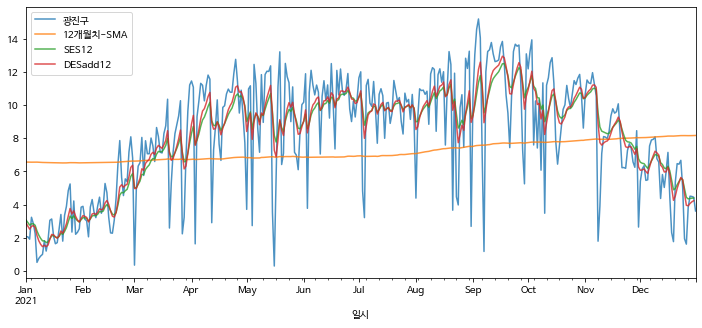

In [55]:
df[['광진구','12개월치-SMA','SES12','DESadd12']]['2021':].plot(alpha=0.8)

In [56]:
# 삼중지수평활법
df['TESadd12'] = ExponentialSmoothing(df['광진구'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,광진구,동대문구,성동구,중랑구,추세,1개월치-SMA,6개월치-SMA,12개월치-SMA,EWMA-12,EWMA12,SES12,DESadd12,TESadd12
일시,,,,,,,,,,,,,
2018-01-01,0.592,0.368,0.580,0.162,0.738881,NaN,NaN,NaN,0.592000,0.592000,0.592000,0.682130,0.633233
2018-01-02,0.840,0.614,1.034,0.260,0.730561,NaN,NaN,NaN,0.716340,0.630154,0.630154,0.721331,0.635568
2018-01-03,0.828,0.576,0.952,0.288,0.722149,NaN,NaN,NaN,0.753764,0.660592,0.660592,0.748570,0.947485
2018-01-04,0.792,0.542,0.914,0.292,0.713622,NaN,NaN,NaN,0.763402,0.680808,0.680808,0.761034,0.672927
2018-01-05,0.818,0.602,0.994,0.308,0.705023,NaN,NaN,NaN,0.774441,0.701915,0.701915,0.776661,0.690793


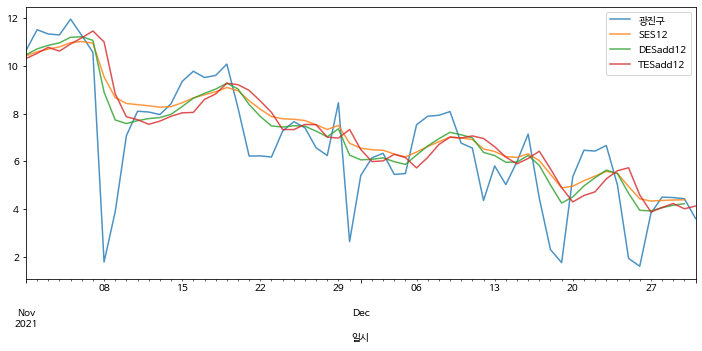

In [59]:
df[['광진구','SES12','DESadd12','TESadd12']]['2021-11':].plot(alpha=0.8)